In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_patients = pd.read_csv('data/South_Korea/PatientInfo.csv')
df_patients.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [8]:
path = 'c:/py/covid19/data/uncover/covid_19_canada_open_data_working_group'
df_can = pd.read_csv(path+'/public-covid-19-cases-canada.csv')
df_can.head()

corrections = {'<10':'0s', '<1':'0s', '2':'0s', '10-19':'10s', 
               '20-29':'20s', '30-39':'30s', '40-49':'40s', 
               '50-59':'50s', '50':'50s', '60-69':'60s', '61':'60s', 
               '70-79':'70s', '80-89':'80s', '90-99':'90s'}

age_list = ['0s', '10s', '20s', '30s', '40s', '50s', 
            '60s', '70s', '80s', '90s', '100s']

df_can = df_can[~df_can['age'].isin(['Not Reported', '<18', '<20'])]

new_age = []
for i, row in df_can.iterrows():
    new_age.append(corrections[row['age']])

df_can['age'] = new_age

In [39]:
len(df_can)

676

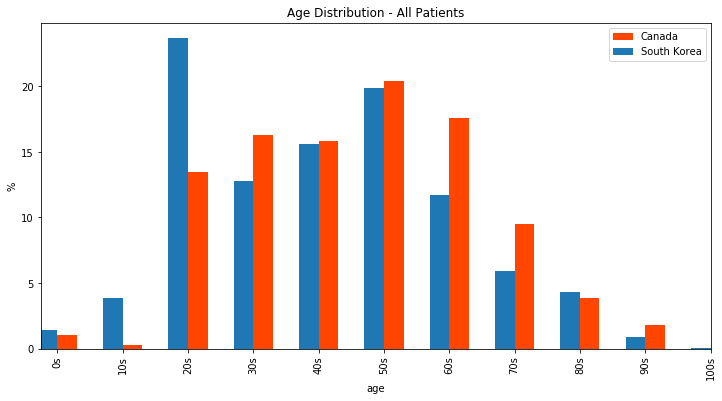

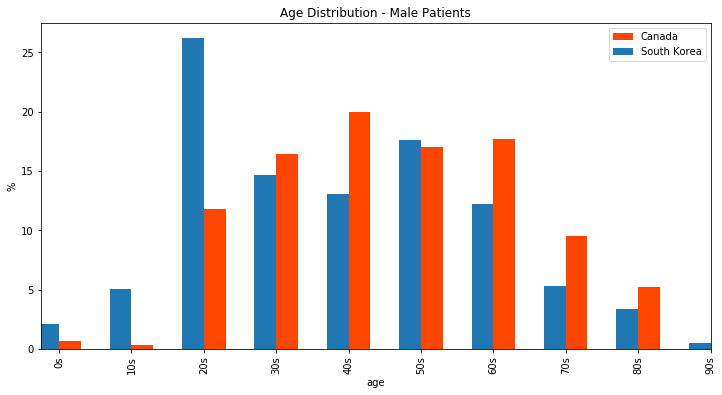

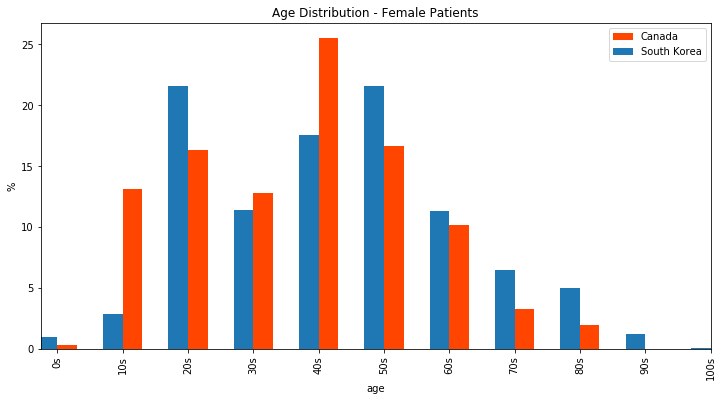

In [37]:
#Age dist - All
fig, ax = plt.subplots(1, figsize=(12,6))

ages_dist = df_patients.groupby('age').count()['patient_id']

ag = pd.DataFrame(ages_dist.index)
ag['count'] = ages_dist.values / ages_dist.sum() * 100
ag['index'] = [0,10,1,2,3,4,5,6,7,8,9]
ag.set_index('index', inplace=True)

ages_dist_can = df_can.groupby('age').count()['provincial_case_id']
ag_can = pd.DataFrame(ages_dist_can.index)
ag_can['count'] = ages_dist_can.values / ages_dist_can.sum() * 100
ag_can.sort_index().plot(kind='bar', x='age', ax=ax, width=0.3, align='edge', color='orangered')

ag.sort_index().plot(kind='bar', x='age', ax=ax, width=-0.3, align='edge')
plt.title('Age Distribution - All Patients')
plt.ylabel('%')
plt.legend(['Canada','South Korea'])
plt.savefig('pics/Age Distribution - All Patients.png', facecolor='white', edgecolor='none')

#Age dist - Male
fig, ax = plt.subplots(1, figsize=(12,6))

ages_dist = df_patients[df_patients['sex'] == 'male'].groupby('age').count()['patient_id']
ag = pd.DataFrame(ages_dist.index)
ag['count'] = ages_dist.values / ages_dist.sum() * 100

ages_dist_can = df_can[df_can['sex'] == 'Male'].groupby('age').count()['provincial_case_id']
ag_can = pd.DataFrame(ages_dist_can.index)
ag_can['count'] = ages_dist_can.values / ages_dist_can.sum() * 100
ag_can.sort_index().plot(kind='bar', x='age', ax=ax, width=0.3, align='edge', color='orangered')

ag.sort_index().plot(kind='bar', x='age', ax=ax, width=-0.3, align='edge')
plt.title('Age Distribution - Male Patients')
plt.ylabel('%')
plt.legend(['Canada','South Korea'])
plt.savefig('pics/Age Distribution - Male Patients.png', facecolor='white', edgecolor='none')

#Age dist - Female
fig, ax = plt.subplots(1, figsize=(12,6))

ages_dist = df_patients[df_patients['sex'] == 'female'].groupby('age').count()['patient_id']

ages_dist

ag = pd.DataFrame(ages_dist.index)
ag['count'] = ages_dist.values / ages_dist.sum() * 100
ag['index'] = [0,10,1,2,3,4,5,6,7,8,9]
ag.set_index('index', inplace=True)

ages_dist_can = df_can[df_can['sex'] == 'Female'].groupby('age').count()['provincial_case_id']
ag_can = pd.DataFrame(ages_dist_can.index)
ag_can['count'] = ages_dist_can.values / ages_dist_can.sum() * 100
ag_can.sort_index().plot(kind='bar', x='age', ax=ax, width=0.3, align='edge', color='orangered')


ag.sort_index().plot(kind='bar', x='age', ax=ax, width=-0.3, align='edge')
plt.title('Age Distribution - Female Patients')
plt.ylabel('%')
plt.legend(['Canada','South Korea'])
plt.savefig('pics/Age Distribution - Female Patients.png', facecolor='white', edgecolor='none')

In [17]:
df_patients['state'].unique()

array(['released', 'isolated', 'deceased', nan], dtype=object)

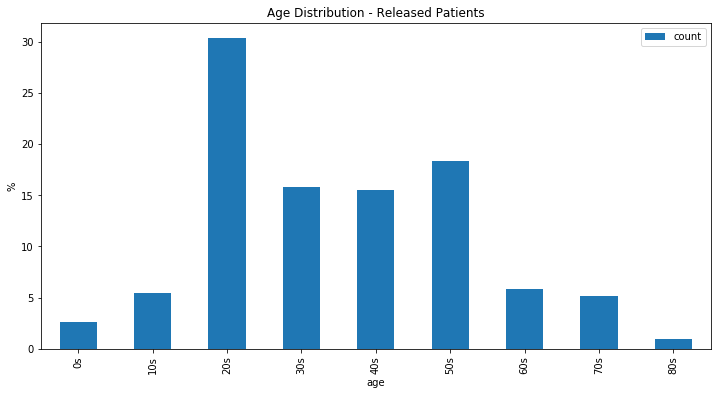

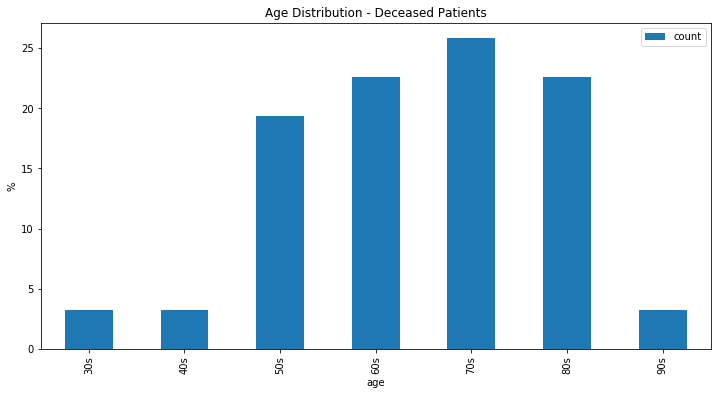

In [4]:
#Age dist - Released
fig, ax = plt.subplots(1, figsize=(12,6))

ages_dist = df_patients[df_patients['state'] == 'released'].groupby('age').count()['patient_id']

ag = pd.DataFrame(ages_dist.index)
ag['count'] = ages_dist.values / ages_dist.sum() * 100

ag.sort_index().plot(kind='bar', x='age', ax=ax)
plt.title('Age Distribution - Released Patients')
plt.ylabel('%')
plt.savefig('pics/Age Distribution - Released Patients.png', facecolor='white', edgecolor='none')

#Age dist - Female
fig, ax = plt.subplots(1, figsize=(12,6))

ages_dist = df_patients[df_patients['state'] == 'deceased'].groupby('age').count()['patient_id']

ages_dist

ag = pd.DataFrame(ages_dist.index)
ag['count'] = ages_dist.values / ages_dist.sum() * 100
#ag['index'] = [0,10,1,2,3,4,5,6,7,8,9]
#ag.set_index('index', inplace=True)

ag.sort_index().plot(kind='bar', x='age', ax=ax)
plt.title('Age Distribution - Deceased Patients')
plt.ylabel('%')
plt.savefig('pics/Age Distribution - Deceased Patients.png', facecolor='white', edgecolor='none')

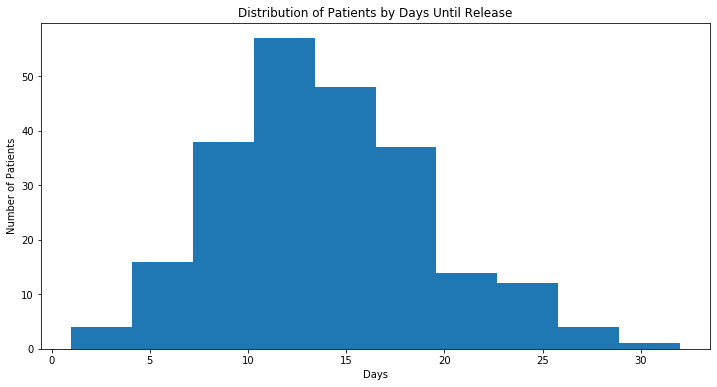

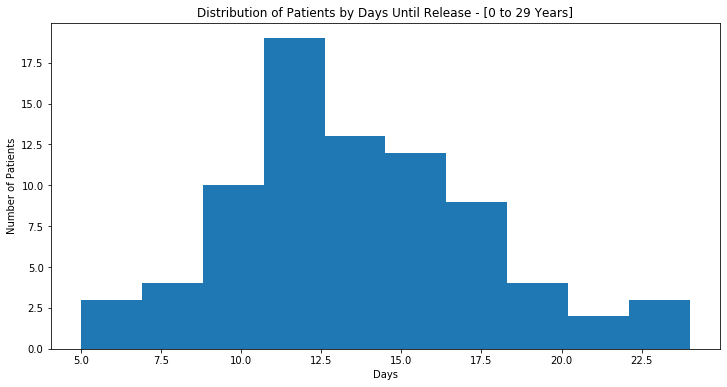

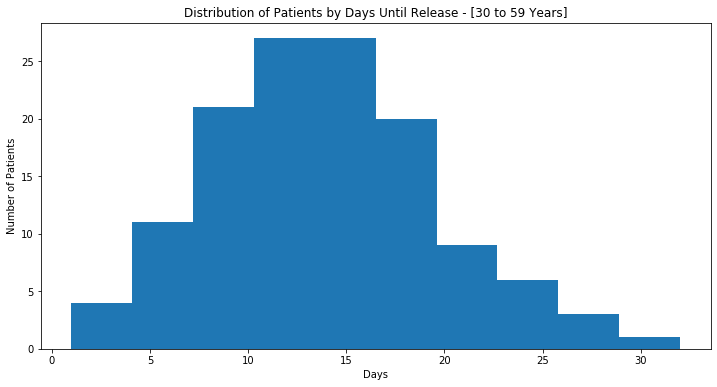

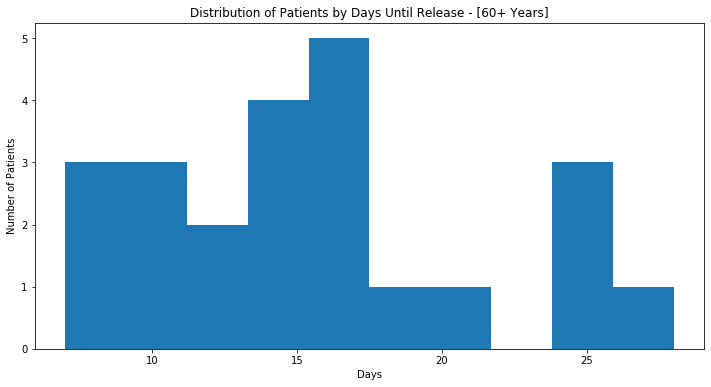

In [5]:
df_released = df_patients[['confirmed_date', 'released_date', 'age']].dropna().copy()
days = df_released['released_date'].astype('datetime64[ns]') - df_released['confirmed_date'].astype('datetime64[ns]')
df_released['dif'] = [i.days for i in days]

fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Release')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Release.png', facecolor='white', edgecolor='none')

# 0 to 29 Years
fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released[df_released['age'].isin(['0s', '10s', '20s'])]['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Release - [0 to 29 Years]')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Release - 0to29.png', facecolor='white', edgecolor='none')

# 30 to 59 Years
fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released[df_released['age'].isin(['30s', '40s', '50s'])]['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Release - [30 to 59 Years]')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Release - 30to59.png', facecolor='white', edgecolor='none')

# 60 or more Years
fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released[df_released['age'].isin(['60s', '70s', '80s', '90s'])]['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Release - [60+ Years]')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Release - 60plus.png', facecolor='white', edgecolor='none')

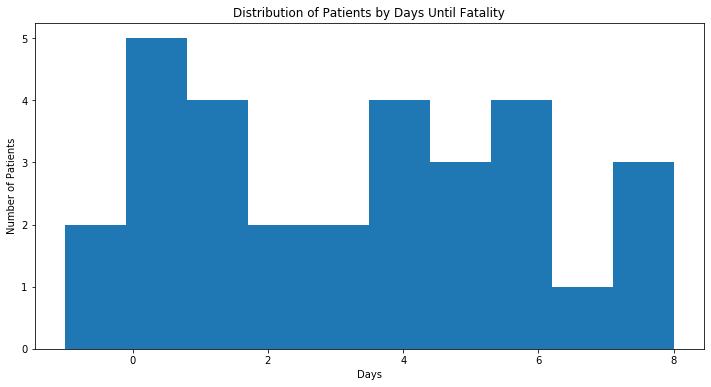

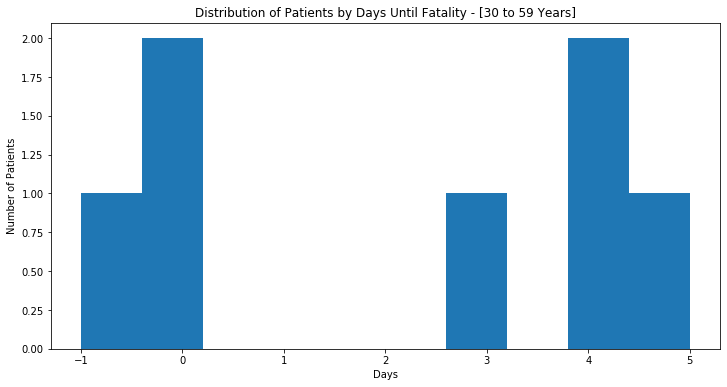

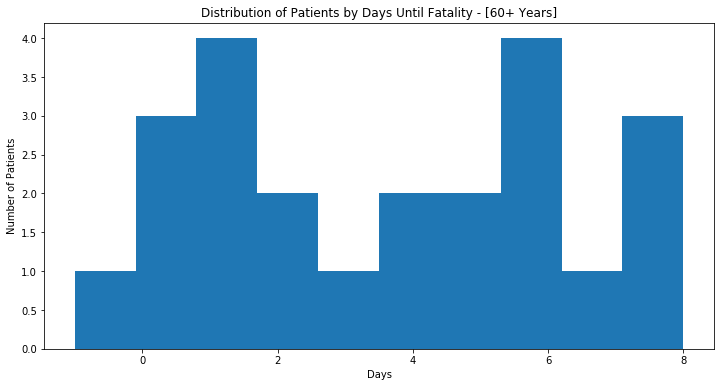

In [6]:
df_released = df_patients[['confirmed_date', 'deceased_date', 'age']].dropna().copy()
days = df_released['deceased_date'].astype('datetime64[ns]') - df_released['confirmed_date'].astype('datetime64[ns]')
df_released['dif'] = [i.days for i in days]

fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Fatality')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Fatality.png', facecolor='white', edgecolor='none')

# 30 to 59 Years
fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released[df_released['age'].isin(['30s', '40s', '50s'])]['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Fatality - [30 to 59 Years]')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Fatality - 30to59.png', facecolor='white', edgecolor='none')

# 60 or more Years
fig, ax = plt.subplots(1, figsize=(12,6))

plt.hist(x=df_released[df_released['age'].isin(['60s', '70s', '80s', '90s'])]['dif'], bins=10)
plt.title('Distribution of Patients by Days Until Fatality - [60+ Years]')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.savefig('pics/Distribution of Patients by Days Until Fatality - 60plus.png', facecolor='white', edgecolor='none')